In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("breast_cancer_implementation_dataset.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [3]:
df.shape

(334, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [6]:
df['Patient_Status'].unique()

array(['Alive', 'Dead', nan], dtype=object)

In [7]:
df['Date_of_Last_Visit'].unique()

array(['26-Aug-18', '25-Jan-19', '08-Apr-20', '28-Jul-20', '05-Jan-19',
       '16-Feb-19', '19-Jun-19', '30-Jun-19', '16-Dec-19', nan,
       '28-Dec-19', '15-Dec-17', '23-Mar-20', '29-Aug-18', '28-Aug-18',
       '25-Oct-18', '26-Dec-19', '15-Aug-19', '01-Jun-19', '09-May-20',
       '06-Mar-20', '06-Oct-19', '04-Nov-22', '06-Feb-19', '02-Apr-20',
       '03-Feb-20', '15-Jul-19', '18-Apr-19', '29-Jan-20', '06-Feb-20',
       '10-Apr-18', '06-Jul-18', '05-Jan-21', '17-Oct-17', '27-Sep-18',
       '03-Aug-19', '06-Aug-18', '16-May-18', '05-Apr-17', '10-Dec-20',
       '26-Jun-20', '19-May-20', '25-Sep-20', '21-Apr-20', '25-Feb-20',
       '25-Mar-20', '02-Sep-18', '24-Jul-17', '13-Jul-19', '24-Aug-19',
       '23-Jan-20', '07-Feb-20', '06-Aug-19', '28-Sep-20', '26-Feb-20',
       '19-Mar-21', '15-Oct-20', '08-Nov-19', '09-Aug-19', '20-Jun-19',
       '26-Jun-22', '25-Oct-19', '05-Jul-20', '15-Feb-21', '07-Oct-19',
       '07-Feb-18', '22-Aug-20', '15-Nov-20', '10-Jan-21', '08-Aug-20',


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Gender,334,2,FEMALE,330
Tumour_Stage,334,3,II,189
Histology,334,3,Infiltrating Ductal Carcinoma,233
ER status,334,1,Positive,334
PR status,334,1,Positive,334
HER2 status,334,2,Negative,305
Surgery_type,334,4,Other,105
Date_of_Surgery,334,181,06-Nov-18,5
Date_of_Last_Visit,317,285,09-Aug-19,3
Patient_Status,321,2,Alive,255


In [9]:
## deal with missing values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
df['Date_of_Last_Visit']=si.fit_transform(df[['Date_of_Last_Visit']])
df['Patient_Status']=si.fit_transform(df[['Patient_Status']])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  334 non-null    object 
 14  Patient_Status      334 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [11]:
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [12]:
df.Gender.value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [13]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=False)

In [14]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,Gender_MALE
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1,0
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1,0


In [15]:
df.drop('Gender_MALE',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Protein1            334 non-null    float64
 2   Protein2            334 non-null    float64
 3   Protein3            334 non-null    float64
 4   Protein4            334 non-null    float64
 5   Tumour_Stage        334 non-null    object 
 6   Histology           334 non-null    object 
 7   ER status           334 non-null    object 
 8   PR status           334 non-null    object 
 9   HER2 status         334 non-null    object 
 10  Surgery_type        334 non-null    object 
 11  Date_of_Surgery     334 non-null    object 
 12  Date_of_Last_Visit  334 non-null    object 
 13  Patient_Status      334 non-null    object 
 14  Gender_FEMALE       334 non-null    uint8  
dtypes: float64(4), int64(1), object(9), uint8(1)
memory usage

In [17]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,1
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,1
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,1
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1


In [18]:
df['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

In [19]:
plt.rcParams["figure.figsize"]=(12,6)


In [20]:
stages_names=df['Tumour_Stage'].value_counts().index
stages_counts=df['Tumour_Stage'].value_counts().values
stages_names
stages_counts

array([189,  81,  64], dtype=int64)

([<matplotlib.patches.Wedge at 0x1ad75daa490>,
 [Text(-0.22600333562782562, 1.076532624812224, 'II'),
  Text(-0.4233403926383604, -1.0152747962797062, 'III'),
  Text(0.9066364550022049, -0.6229047587400782, 'I')],
 [Text(-0.12327454670608669, 0.5871996135339403, '56.59%'),
  Text(-0.23091294143910562, -0.5537862525162033, '24.25%'),
  Text(0.4945289754557481, -0.33976623204004264, '19.16%')])

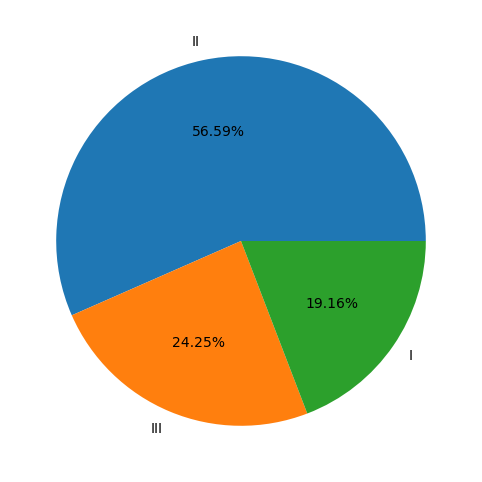

In [21]:
plt.pie(stages_counts,labels=stages_names,autopct="%1.2f%%")

In [22]:
df['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

In [23]:
df['Tumour_Stage']=df['Tumour_Stage'].map({'I':1,'II':2,'III':3})

In [24]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE
0,42,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,1
1,54,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,1
2,63,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1
3,78,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,1
4,42,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Protein1            334 non-null    float64
 2   Protein2            334 non-null    float64
 3   Protein3            334 non-null    float64
 4   Protein4            334 non-null    float64
 5   Tumour_Stage        334 non-null    int64  
 6   Histology           334 non-null    object 
 7   ER status           334 non-null    object 
 8   PR status           334 non-null    object 
 9   HER2 status         334 non-null    object 
 10  Surgery_type        334 non-null    object 
 11  Date_of_Surgery     334 non-null    object 
 12  Date_of_Last_Visit  334 non-null    object 
 13  Patient_Status      334 non-null    object 
 14  Gender_FEMALE       334 non-null    uint8  
dtypes: float64(4), int64(2), object(8), uint8(1)
memory usage

In [26]:
##Histology
df['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [27]:
df['Histology'].value_counts()

Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [28]:
names=df['Histology'].value_counts().index
counts=df['Histology'].value_counts().values

([<matplotlib.patches.Wedge at 0x1ad764c3100>,
 [Text(-0.6398490577293473, 0.8947587291124164, 'Infiltrating Ductal Carcinoma'),
  Text(0.5349989590344679, -0.9611327243581065, 'Infiltrating Lobular Carcinoma'),
  Text(1.093000425817675, -0.12389539604997818, 'Mucinous Carcinoma')],
 [Text(-0.3490085769432803, 0.4880502158794998, '69.76%'),
  Text(0.29181761401880063, -0.5242542132862398, '26.65%'),
  Text(0.5961820504460046, -0.06757930693635172, '3.59%')])

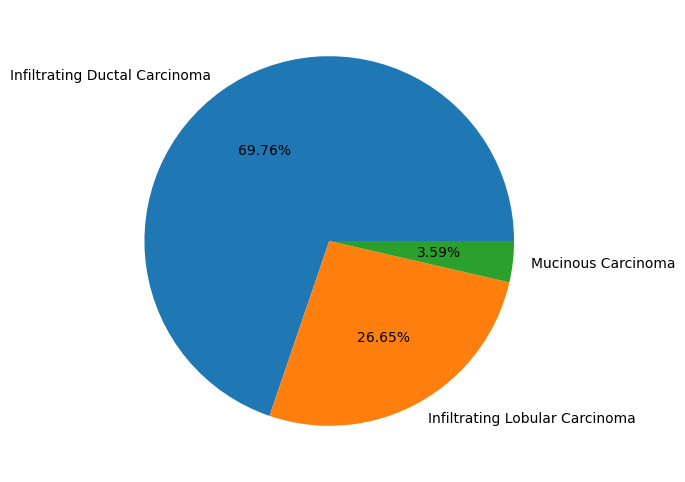

In [29]:
plt.pie(counts,labels=names,autopct="%1.2f%%")

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Histology']=le.fit_transform(df['Histology'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Protein1            334 non-null    float64
 2   Protein2            334 non-null    float64
 3   Protein3            334 non-null    float64
 4   Protein4            334 non-null    float64
 5   Tumour_Stage        334 non-null    int64  
 6   Histology           334 non-null    int32  
 7   ER status           334 non-null    object 
 8   PR status           334 non-null    object 
 9   HER2 status         334 non-null    object 
 10  Surgery_type        334 non-null    object 
 11  Date_of_Surgery     334 non-null    object 
 12  Date_of_Last_Visit  334 non-null    object 
 13  Patient_Status      334 non-null    object 
 14  Gender_FEMALE       334 non-null    uint8  
dtypes: float64(4), int32(1), int64(2), object(7), uint8(1)
me

In [32]:
df['Histology'].unique()

array([0, 1, 2])

In [33]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,1
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,1
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,1
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1


In [34]:
df['ER status'].unique()

array(['Positive'], dtype=object)

In [35]:
df['PR status'].unique()

array(['Positive'], dtype=object)

In [36]:
df['HER2 status'].unique()

array(['Negative', 'Positive'], dtype=object)

In [37]:
df=pd.get_dummies(df,columns=['HER2 status'],drop_first=True)

In [38]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,HER2 status_Positive
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,Positive,Positive,Other,20-May-18,26-Aug-18,Alive,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,Positive,Positive,Other,26-Apr-18,25-Jan-19,Dead,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,Positive,Positive,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,Positive,Positive,Other,16-Nov-18,28-Jul-20,Alive,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1,1


In [39]:
df.drop(['ER status','PR status'],axis=1,inplace=True)

In [40]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,HER2 status_Positive
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,Other,20-May-18,26-Aug-18,Alive,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,Other,26-Apr-18,25-Jan-19,Dead,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,Lumpectomy,24-Aug-18,08-Apr-20,Alive,1,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,Other,16-Nov-18,28-Jul-20,Alive,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,Lumpectomy,12-Dec-18,05-Jan-19,Alive,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    object 
 8   Date_of_Surgery       334 non-null    object 
 9   Date_of_Last_Visit    334 non-null    object 
 10  Patient_Status        334 non-null    object 
 11  Gender_FEMALE         334 non-null    uint8  
 12  HER2 status_Positive  334 non-null    uint8  
dtypes: float64(4), int32(1), int64(2), object(4), uint8(2)
memory usage: 28.2+ KB


In [42]:
df['Surgery_type'].unique

<bound method Series.unique of 0                            Other
1                            Other
2                       Lumpectomy
3                            Other
4                       Lumpectomy
                  ...             
329                     Lumpectomy
330    Modified Radical Mastectomy
331              Simple Mastectomy
332                     Lumpectomy
333    Modified Radical Mastectomy
Name: Surgery_type, Length: 334, dtype: object>

In [43]:
df['Surgery_type'].value_counts()

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

<AxesSubplot:xlabel='Surgery_type', ylabel='count'>

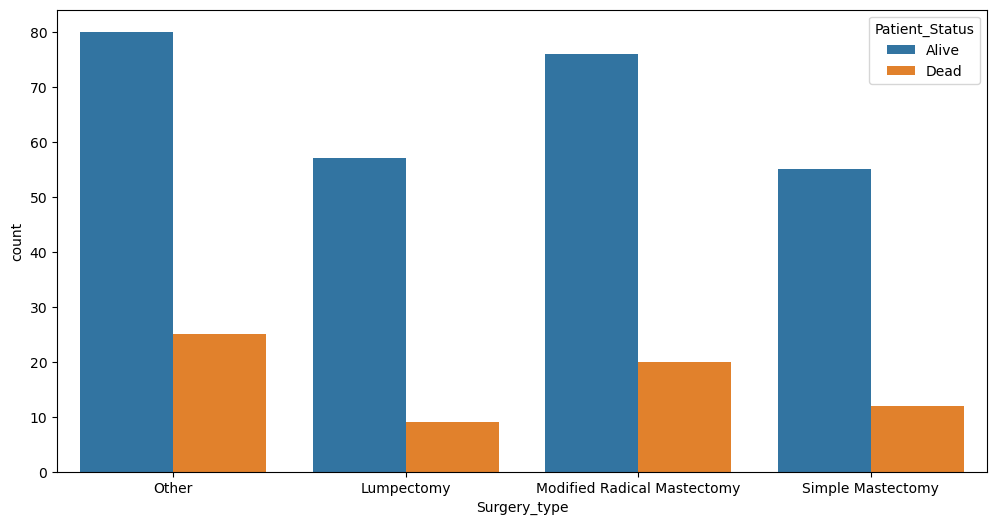

In [44]:
sns.countplot(x='Surgery_type',data=df,hue='Patient_Status')

In [45]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Surgery_type']=le1.fit_transform(df['Surgery_type'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    int32  
 8   Date_of_Surgery       334 non-null    object 
 9   Date_of_Last_Visit    334 non-null    object 
 10  Patient_Status        334 non-null    object 
 11  Gender_FEMALE         334 non-null    uint8  
 12  HER2 status_Positive  334 non-null    uint8  
dtypes: float64(4), int32(2), int64(2), object(3), uint8(2)
memory usage: 26.9+ KB


In [47]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,HER2 status_Positive
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,2,20-May-18,26-Aug-18,Alive,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,2,26-Apr-18,25-Jan-19,Dead,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,24-Aug-18,08-Apr-20,Alive,1,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,2,16-Nov-18,28-Jul-20,Alive,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,0,12-Dec-18,05-Jan-19,Alive,1,1


In [48]:
df['Patient_Status']=le1.fit_transform(df['Patient_Status'])

In [49]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,HER2 status_Positive
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,2,20-May-18,26-Aug-18,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,2,26-Apr-18,25-Jan-19,1,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,24-Aug-18,08-Apr-20,0,1,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,2,16-Nov-18,28-Jul-20,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,0,12-Dec-18,05-Jan-19,0,1,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    int32  
 8   Date_of_Surgery       334 non-null    object 
 9   Date_of_Last_Visit    334 non-null    object 
 10  Patient_Status        334 non-null    int32  
 11  Gender_FEMALE         334 non-null    uint8  
 12  HER2 status_Positive  334 non-null    uint8  
dtypes: float64(4), int32(3), int64(2), object(2), uint8(2)
memory usage: 25.6+ KB


In [51]:
df['Surgery_year']=pd.DatetimeIndex(df['Date_of_Surgery']).year
df['Surgery_month']=pd.DatetimeIndex(df['Date_of_Surgery']).month
df['Surgery_day']=pd.DatetimeIndex(df['Date_of_Surgery']).day

In [52]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_FEMALE,HER2 status_Positive,Surgery_year,Surgery_month,Surgery_day
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,2,20-May-18,26-Aug-18,0,1,0,2018,5,20
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,2,26-Apr-18,25-Jan-19,1,1,0,2018,4,26
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,24-Aug-18,08-Apr-20,0,1,0,2018,8,24
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,2,16-Nov-18,28-Jul-20,0,1,0,2018,11,16
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,0,12-Dec-18,05-Jan-19,0,1,1,2018,12,12


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    int32  
 8   Date_of_Surgery       334 non-null    object 
 9   Date_of_Last_Visit    334 non-null    object 
 10  Patient_Status        334 non-null    int32  
 11  Gender_FEMALE         334 non-null    uint8  
 12  HER2 status_Positive  334 non-null    uint8  
 13  Surgery_year          334 non-null    int64  
 14  Surgery_month         334 non-null    int64  
 15  Surgery_day           3

In [54]:
df.drop('Date_of_Surgery',axis=1,inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    int32  
 8   Date_of_Last_Visit    334 non-null    object 
 9   Patient_Status        334 non-null    int32  
 10  Gender_FEMALE         334 non-null    uint8  
 11  HER2 status_Positive  334 non-null    uint8  
 12  Surgery_year          334 non-null    int64  
 13  Surgery_month         334 non-null    int64  
 14  Surgery_day           334 non-null    int64  
dtypes: float64(4), int32(3)

In [56]:
df['year_of_Last_Visit']=pd.DatetimeIndex(df['Date_of_Last_Visit']).year
df['month_of_Last_Visit']=pd.DatetimeIndex(df['Date_of_Last_Visit']).month
df['day_of_Last_Visit']=pd.DatetimeIndex(df['Date_of_Last_Visit']).day

In [57]:
df.drop('Date_of_Last_Visit',axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   334 non-null    int64  
 1   Protein1              334 non-null    float64
 2   Protein2              334 non-null    float64
 3   Protein3              334 non-null    float64
 4   Protein4              334 non-null    float64
 5   Tumour_Stage          334 non-null    int64  
 6   Histology             334 non-null    int32  
 7   Surgery_type          334 non-null    int32  
 8   Patient_Status        334 non-null    int32  
 9   Gender_FEMALE         334 non-null    uint8  
 10  HER2 status_Positive  334 non-null    uint8  
 11  Surgery_year          334 non-null    int64  
 12  Surgery_month         334 non-null    int64  
 13  Surgery_day           334 non-null    int64  
 14  year_of_Last_Visit    334 non-null    int64  
 15  month_of_Last_Visit   3

In [59]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Patient_Status,Gender_FEMALE,HER2 status_Positive,Surgery_year,Surgery_month,Surgery_day,year_of_Last_Visit,month_of_Last_Visit,day_of_Last_Visit
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,2,0,1,0,2018,5,20,2018,8,26
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,2,1,1,0,2018,4,26,2019,1,25
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,0,1,0,2018,8,24,2020,4,8
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,2,0,1,0,2018,11,16,2020,7,28
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,0,0,1,1,2018,12,12,2019,1,5


# training and testing of dataset

In [60]:
#splitting the dataset
X=df.drop(columns=['Patient_Status'])#independent variables
X.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Gender_FEMALE,HER2 status_Positive,Surgery_year,Surgery_month,Surgery_day,year_of_Last_Visit,month_of_Last_Visit,day_of_Last_Visit
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,2,1,0,2018,5,20,2018,8,26
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,2,1,0,2018,4,26,2019,1,25
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,1,0,2018,8,24,2020,4,8
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,2,1,0,2018,11,16,2020,7,28
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,0,1,1,2018,12,12,2019,1,5


In [61]:
#dependent variable
y=df['Patient_Status']
y

0      0
1      1
2      0
3      0
4      0
      ..
329    0
330    0
331    1
332    0
333    1
Name: Patient_Status, Length: 334, dtype: int32

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [64]:
##using logistic regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

C:\Users\hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred=model1.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy*100)

Accuracy 80.18018018018019


In [68]:
!pip install lazypredict

   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
   --------------------------------------- 124.9/124.9 MB 14.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
model,predictions = clf.fit(X_train,X_test,y_train,y_test)
print(predictions)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.65it/s]

[LightGBM] [Info] Number of positive: 45, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201794 -> initscore=-1.375121
[LightGBM] [Info] Start training from score -1.375121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
